In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

import keras
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Activation
from keras.applications import xception

In [2]:
import pathlib

path= "D:/preprocessed dataset 2/Train"
path = pathlib.Path(path)

In [3]:
height= 128
width= 128
batch_size= 16
train_ds=tf.keras.preprocessing.image_dataset_from_directory(path,
                                                             validation_split=0.2,
                                                             labels='inferred',
                                                             subset="training",
                                                             seed=123,
                                                             image_size=(height,width),
                                                             label_mode='categorical',
                                                             batch_size=batch_size,
                                                            shuffle=True)

Found 3240 files belonging to 4 classes.
Using 2592 files for training.


In [4]:
height= 128
width= 128
batch_size= 16
val_ds=tf.keras.preprocessing.image_dataset_from_directory(path,
                                                             validation_split=0.2,
                                                             labels='inferred',
                                                             subset="validation",
                                                             seed=123,
                                                             image_size=(height,width),
                                                             label_mode='categorical',
                                                             batch_size=batch_size,
                                                            shuffle=True)

Found 3240 files belonging to 4 classes.
Using 648 files for validation.


In [5]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    "D:/preprocessed dataset 2/Test",
    labels='inferred',
    batch_size=16,
    image_size=(128, 128),
    shuffle = False)

Found 1200 files belonging to 4 classes.


In [6]:
class_names= train_ds.class_names
print(class_names)

['Falciparum', 'Malarie', 'Ovale', 'Vivax']


In [7]:
xception_model= Sequential()
pretrained_model= keras.applications.Xception(
    include_top= False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling='avg',
    classes=4,
    classifier_activation="softmax",
)
xception_model.add(pretrained_model)
xception_model.add(Flatten())
xception_model.add(Dense(512, activation='relu'))
xception_model.add(Dropout(0.2))
xception_model.add(Dense(4, activation='softmax'))

In [8]:
xception_model.compile(loss= "categorical_crossentropy",
             optimizer="Adam",
             metrics=["accuracy"])

In [9]:
history = xception_model.fit(train_ds,
         validation_data=val_ds,
         epochs=10,
         batch_size=16,shuffle= True)

Epoch 1/10


162/162 [==============================] - 938s 6s/step - loss: 0.8105 - accuracy: 0.7172 - val_loss: 49.5653 - val_accuracy: 0.2809
Epoch 2/10
162/162 [==============================] - 1209s 7s/step - loss: 0.4573 - accuracy: 0.8638 - val_loss: 4.6088 - val_accuracy: 0.5772
Epoch 3/10
162/162 [==============================] - 241s 1s/step - loss: 0.3161 - accuracy: 0.9043 - val_loss: 0.6325 - val_accuracy: 0.8133
Epoch 4/10
162/162 [==============================] - 264s 2s/step - loss: 0.2949 - accuracy: 0.9132 - val_loss: 0.5835 - val_accuracy: 0.9028
Epoch 5/10
162/162 [==============================] - 263s 2s/step - loss: 0.2003 - accuracy: 0.9464 - val_loss: 0.1128 - val_accuracy: 0.9676
Epoch 6/10
162/162 [==============================] - 270s 2s/step - loss: 0.1834 - accuracy: 0.9468 - val_loss: 0.7984 - val_accuracy: 0.7994
Epoch 7/10
162/162 [==============================] - 261s 2s/step - loss: 0.1406 - accuracy: 0.9599 - val_loss: 0.0647 - val_accuracy: 0.

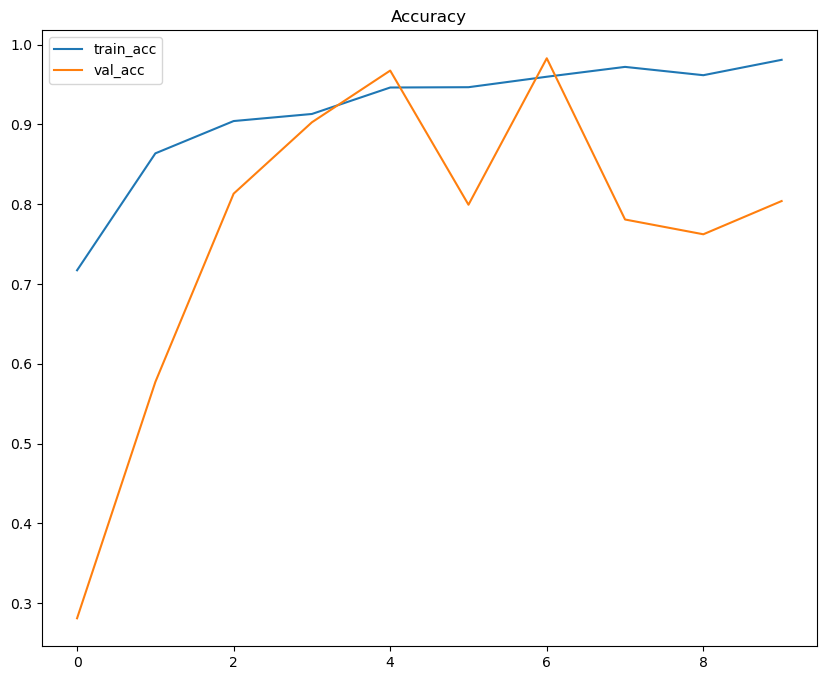

In [10]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

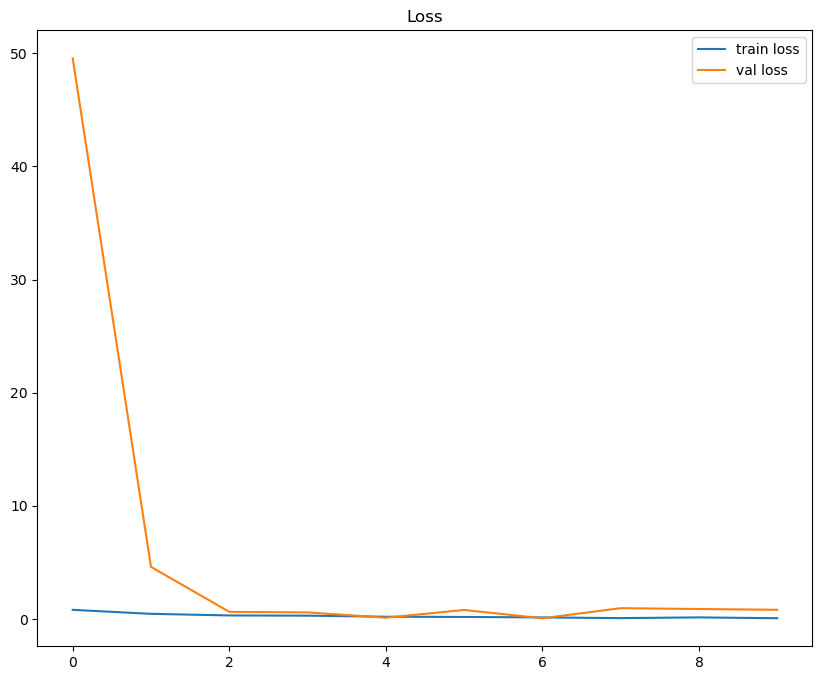

In [11]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [12]:
predictions = xception_model.predict(test_dataset)

75/75 [==============================] - 67s 802ms/step


In [13]:
import numpy as np
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in test_dataset],axis=0)

[Text(0, 0.5, 'Falciparum'),
 Text(0, 1.5, 'Malarie'),
 Text(0, 2.5, 'Ovale'),
 Text(0, 3.5, 'Vivax')]

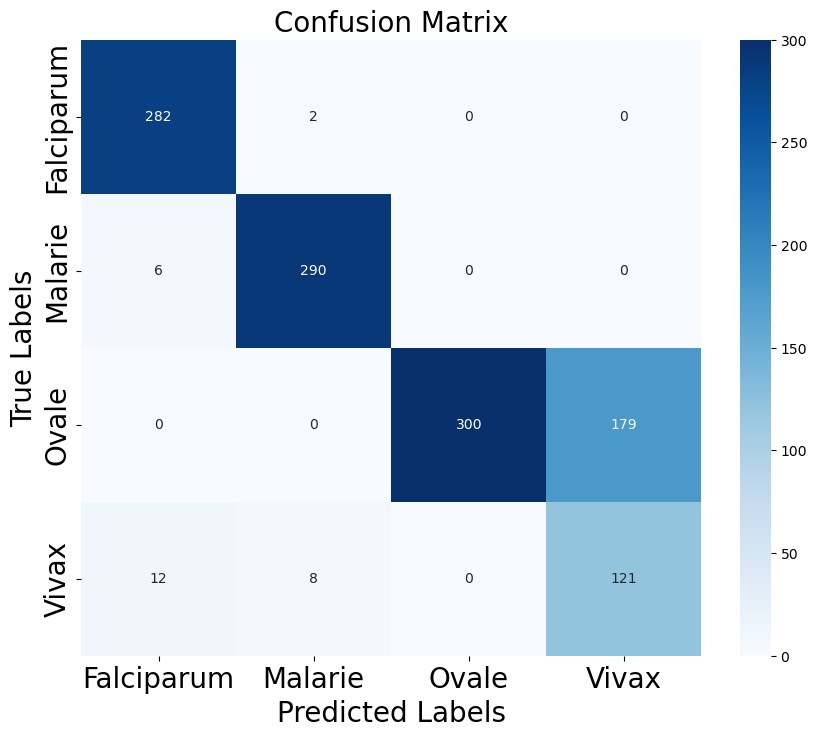

In [16]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(predicted_labels,true_labels)
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap= "Blues",ax=ax)
ax.set_xlabel('Predicted Labels',fontsize=20);ax.set_ylabel('True Labels', fontsize=20)
ax.set_title('Confusion Matrix',fontsize=20);
ax.xaxis.set_ticklabels(['Falciparum', 'Malarie', 'Ovale','Vivax'], fontsize=20); ax.yaxis.set_ticklabels(['Falciparum', 'Malarie', 'Ovale','Vivax'], fontsize=20)

In [17]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision=precision_score(true_labels, predicted_labels,average='micro')
conf_matrix = confusion_matrix(true_labels,predicted_labels) 
class_report = classification_report(true_labels,predicted_labels)

print("Accuracy:",accuracy)
print("Recall score:",recall)
print("F1 score:",f1)
print("Precision score:",precision)
print("Confusion matrix:\n",conf_matrix)
print("Class Report:\n",class_report)

Accuracy: 0.8275
Recall score: 0.8275
F1 score: 0.814469712509709
Precision score: 0.8275
Confusion matrix:
 [[282   6   0  12]
 [  2 290   0   8]
 [  0   0 300   0]
 [  0   0 179 121]]
Class Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       300
           1       0.98      0.97      0.97       300
           2       0.63      1.00      0.77       300
           3       0.86      0.40      0.55       300

    accuracy                           0.83      1200
   macro avg       0.86      0.83      0.81      1200
weighted avg       0.86      0.83      0.81      1200



In [18]:
print("Accuracy:",accuracy)

Accuracy: 0.8275
